## Problem description

The problem describes a one-dimensional column at $T$=300 K in sudden contact with a temperature reservoir at one side at $T_1$ = 350 K.

Thermo-osmotic and filtration effects are described by contributions to the hydraulic flux $J^w$
\begin{equation}
J^w=-\rho_w \frac{\mathbf{k}}{\mu}\left(\nabla p-\rho_w \mathbf{g} \right)-\rho_w \mathbf{k}_{pT} \nabla T,
\end{equation}
and the conductive heat flux $I$
\begin{equation}
I=- \mathbf{\lambda}_s (1-\phi)+\mathbf{\lambda}_w \phi)- \mathbf{k}_{Tp} \nabla p,
\end{equation}

where $\mathbf{k}_{pT}$ is the phenomenological coefficient of thermo-osmosis and $\mathbf{k}_{Tp}$ the phenomenological coefficient of thermo-filtration.
It can be shown that $\mathbf{k}_{Tp}=T*\mathbf{k}_{pT}$ (Zhou et al. 1998).


## Get benchmark results


In [1]:
import os
import vtuIO
import numpy as np

filename = "expected_Column_ts_68_t_7200000.000000.vtu"
data_dir = os.environ.get("OGS_DATA_DIR", "../../Data")
file = {}
file["THM"] = f"{data_dir}/ThermoHydroMechanics/Linear/ThermoOsmosis/{filename}"
file["TR"] = f"{data_dir}/ThermoRichardsFlow/ThermoOsmosis/{filename}"
file["TRM"] = f"{data_dir}/ThermoRichardsMechanics/ThermoOsmosis/{filename}"
x = np.array([i * 0.1 for i in range(200)])
r = np.array([[i, 0.5, 0.0] for i in x])
resp = {}
respvars = ["temperature", "pressure"]
for model in file:
    resp[model] = {}
    f = vtuIO.VTUIO(file[model], dim=2)
    for var in respvars:
        if "M" in model:
            resp[model][var] = f.get_set_data(f"{var}_interpolated", pointsetarray=r)
        else:
            resp[model][var] = f.get_set_data(f"{var}", pointsetarray=r)

/home/buchwalj/.local/lib/python3.10/site-packages/vtuIO.py:147: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["r_"+str(i)] = (df[x]-val[x]) * (df[x]-val[x]) + (df[y]-val[y]) * (df[y]-val[y])


## Read-in the analytical solution

An analytical solution was provided by Zhou et al. 1998 and can be obtained via [github](https://github.com/joergbuchwald/thermo-osmosis_analytical_solution).
For this example we used $\mathbf{k}_{pT}=2.7e-10\, m^2/(s K)$ and a fully saturated material. More details on model parameters can be found in the corresponding project files.
The Thermo-Richards (TR) model uses a correction to account for mechanical effects in the mass-balance equation. See Buchwald et al. 2021 for further details.

In [3]:
import zhou_solution_thermo_osmosis

aTO = zhou_solution_thermo_osmosis.ANASOL(0, 50, 100)
aNoTO = zhou_solution_thermo_osmosis.ANASOL(0, 50, 100)
aNoTO.Sw = 0
t = 7.2e6

## Plot temperature and pressure along the column

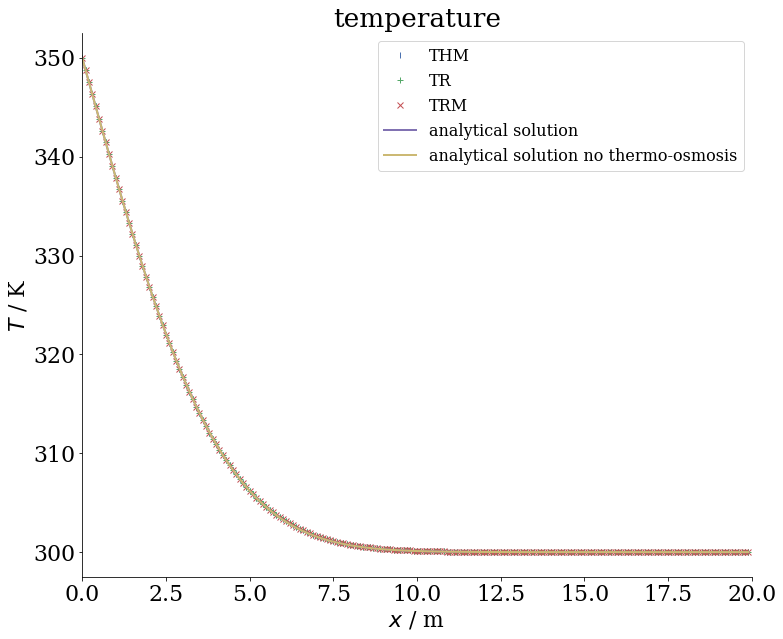

In [9]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 10)
plt.rcParams["font.size"] = 22
marker = ["|", "+", "x"]

for i, model in enumerate(resp):
    plt.plot(x, resp[model]["temperature"], marker[i], label=model)
plt.plot(x, (aTO.T(x, t, 10) + 300), label="analytical solution")
plt.plot(x, (aNoTO.T(x, t, 10) + 300), label="analytical solution no thermo-osmosis")
plt.xlabel("$x$ / m")
plt.xlim([0, 20])
plt.ylabel("$T$ / K")
plt.legend()
plt.title("temperature")

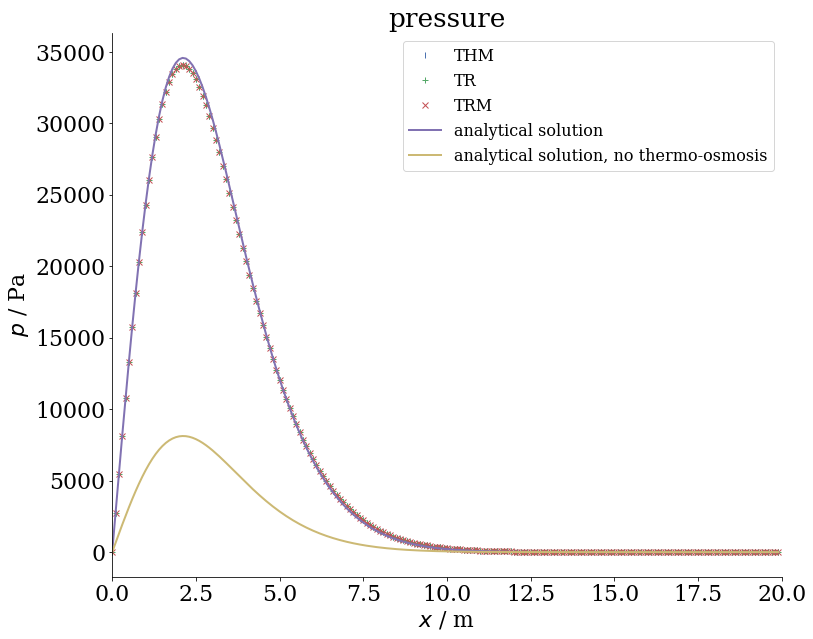

In [10]:
for i, model in enumerate(resp):
    plt.plot(x, resp[model]["pressure"], marker[i], label=model)
plt.plot(x, (aTO.p(x, t, 10)), label="analytical solution")
plt.plot(x, (aNoTO.p(x, t, 10)), label="analytical solution, no thermo-osmosis")
plt.xlabel("$x$ / m")
plt.ylabel("$p$ / Pa")
plt.xlim([0, 20])
plt.legend()
plt.title("pressure")

## Diffference between analytical and the numerical solution:

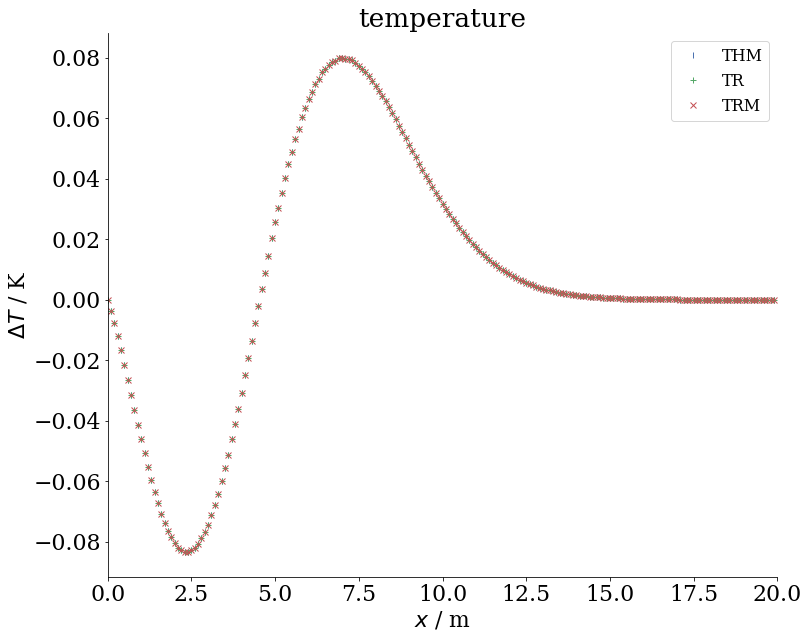

In [11]:
for i, model in enumerate(resp):
    plt.plot(
        x,
        (resp[model]["temperature"] - (aTO.T(x, t, 10) + 300)),
        marker[i],
        label=model,
    )
plt.xlabel("$x$ / m")
plt.xlim([0, 20])
plt.ylabel("$\Delta T$ / K")
plt.legend()
plt.title("temperature")

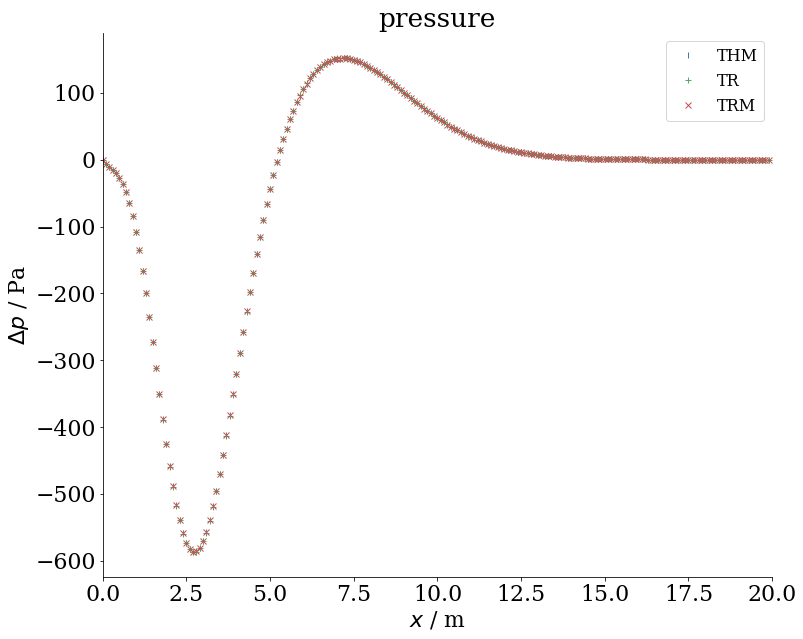

In [12]:
for i, model in enumerate(resp):
    plt.plot(x, resp[model]["pressure"] - aTO.p(x, t, 200), marker[i], label=model)
plt.xlabel("$x$ / m")
plt.ylabel("$\Delta p$ / Pa")
plt.xlim([0, 20])
plt.legend()
plt.title("pressure")

The differences between the analytical solution and OGS is assumed to come from the neglectance of the advective heat-flux in the analytical solution.

## References

[1] Zhou, Y., Rajapakse, R. K. N. D., & Graham, J. (1998). A coupled thermoporoelastic model with thermo-osmosis and thermal-filtration, International Journal of Solids and Structures, 35(34-35), 4659-4683.

[2] Buchwald, J., Kaiser, S., Kolditz, O., & Nagel, T. (2021). Improved predictions of thermal fluid pressurization in hydro-thermal models based on consistent incorporation of thermo-mechanical effects in anisotropic porous media. International Journal of Heat and Mass Transfer, 172, 121127.